In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.patches import Patch
from astropy.io import fits

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (8, 8)
fontSize = 20

### KiDS-1000 Samples

In [2]:
# load the fits file
data_tables = fits.open('data/kids_1000.fits')

# extract the n(z) distribution
nofz = data_tables['NZ_SOURCE'].data

# get the redshifts
redshifts = np.concatenate((np.zeros(1), nofz['Z_MID']))

# heights for the n(z) distribution
heights = []

for zbin in range(5):

    hist_pz = nofz['BIN{:}'.format(zbin + 1)]

    heights += [np.concatenate((np.zeros(1), hist_pz))]

heights = np.asarray(heights)

In [3]:
norm_0 = np.trapz(heights[0], redshifts)
norm_1 = np.trapz(heights[1], redshifts)
norm_2 = np.trapz(heights[2], redshifts)
norm_3 = np.trapz(heights[3], redshifts)
norm_4 = np.trapz(heights[4], redshifts)

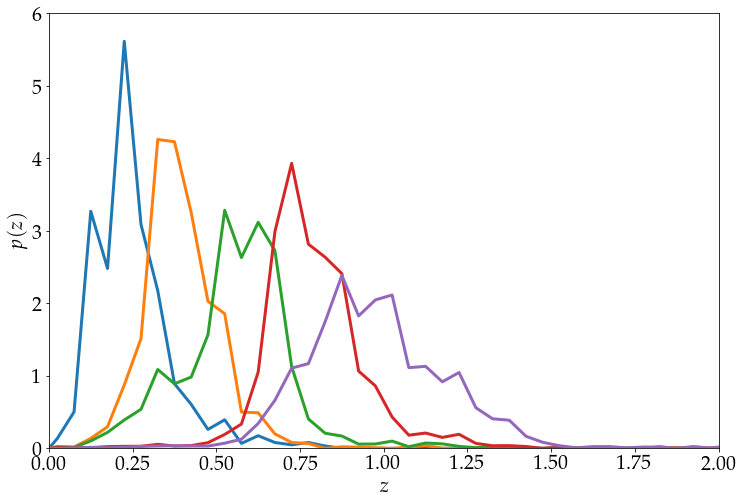

In [4]:
plt.figure(figsize=(12,8))
plt.plot(redshifts, heights[0]/norm_0, lw = 3)
plt.plot(redshifts, heights[1]/norm_1, lw = 3)
plt.plot(redshifts, heights[2]/norm_2, lw = 3)
plt.plot(redshifts, heights[3]/norm_3, lw = 3)
plt.plot(redshifts, heights[4]/norm_4, lw = 3)
plt.ylabel(r'$p(z)$', fontsize = fontSize)
plt.xlabel(r'$z$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xlim(0.0, 2.0)
plt.ylim(0.0, 6.0)
# plt.savefig('plots/distributions_som_kids_1000.pdf', bbox_inches = 'tight')
plt.show()